In [ ]:
# Install the Kaggle CLI (Command Line Interface) utility
!pip install -q kaggle

In [ ]:
# Create a new directory named .kaggle
!mkdir ~/.kaggle

In [25]:
# Copy file kaggle.json to the .kaggle directory
!cp kaggle.json ~/.kaggle

In [ ]:
# Sets the permissions of the kaggle.json file to be read and write only for the owner
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Using the Kaggle CLI to download a dataset from Kaggle.
!kaggle datasets download -d 'justlearn47/penjualan-mobil-toyota-di-indonesia'

  0% 0.00/973 [00:00<?, ?B/s]
100% 973/973 [00:00<00:00, 2.13MB/s]


In [ ]:
import zipfile

In [13]:
# Extract zipfile
dataset_zip=zipfile.ZipFile('penjualan-mobil-toyota-di-indonesia.zip','r')
dataset_zip.extractall()
dataset_zip.close()

The code provided serves as an illustration for calculating the **Confidence Interval with a Known Standard Deviation**. I am utilizing the ['penjualan-mobil-toyota-di-indonesia'
](https://www.kaggle.com/datasets/justlearn47/penjualan-mobil-toyota-di-indonesia) dataset obtained from Kaggle. This dataset encompasses the monthly sales data of automobiles from 2011 to 2023, totaling 150 data points. For this analysis, I will draw a sample consisting of 100 data points and 95% confidence interval.

In [53]:
import pandas as pd
import os
import numpy as np
from scipy import stats

In [42]:
# Read a CSV file named "penjualan_mobil_toyota.csv" and
# display the first 10 rows of the data
path = "penjualan_mobil_toyota.csv"
adv = pd.read_csv(path)
adv.head(10)

,Bulan,Penjualan
0,2011-01,27619
1,2011-02,25532
2,2011-03,32275
3,2011-04,21128
4,2011-05,19554
5,2011-06,26175
6,2011-07,30149
7,2011-08,25207
8,2011-09,30655
9,2011-10,31109


In [41]:
kolom_penjualan = adv['Penjualan']

# Computing the mean and standard deviation of the whole population
rata_rata_penjualan = np.mean(kolom_penjualan)
standar_deviasi_penjualan = np.std(kolom_penjualan)

print("Rata-rata penjualan:", rata_rata_penjualan)
print("Standar deviasi penjualan:", standar_deviasi_penjualan)

Rata-rata penjualan: 28402.845637583894
Standar deviasi penjualan: 7553.922511632133


In [57]:
# Randomly selects 100 elements from the 'Penjualan' column
sample_size=100
sample_penjualan = np.random.choice(adv['Penjualan'], sample_size)
print("Sampel acak dari kolom 'penjualan':", sample_penjualan)

# Computing the mean of the sample
sample_mean=np.mean(sample_penjualan)
print("Rata-rata sample:", sample_mean)

Sampel acak dari kolom 'penjualan': [29979 33306 33328 28757 29360 39210 25447 31981 35923 31440 29360 39210
  2053 29362 16033 32377 36994 21730 30273 32707 31109 18642 16345 15144
 23967 32707 24119 28835 32377 39246 28178 29408 31662 21763 29607 23301
 31801 28757 18687 34819 38656 30149 26743 15195 19554 34427 31621 31981
 21518 26175 24865  8673 38959 24718 18642 30053 24119 30273 39668 27779
 26258 34690 33344 33328 23706 28970 25405 34737 21730 39668 31801 33449
 36996 23223 31991 33344 21763 33344 30655 29362 28797 28970 28757 13150
 24718 19554 24899  8673 40781 31991 31831 27779 35886 26175 31519 31621
 28178 29408 26462 36353]
Rata-rata sample: 28363.38


In [58]:
# Assign the z_critical value
z_critical = stats.norm.ppf(q=0.95)

# Margin of Error
moe = z_critical * (standar_deviasi_penjualan / np.sqrt(sample_size))

# Confidence Interval
confidence_interval = (sample_mean - moe, sample_mean + moe)

print("Confidence Interval:")
print(confidence_interval)

Confidence Interval:
(27120.87031590315, 29605.889684096852)


In [60]:
intervals = []
sample_means = []

for sample in range(20):
   # Get a sample of the data with replacement
   sample = np.random.choice(kolom_penjualan , sample_size)

   # Save the mean of the sample
   sample_means.append(np.mean(sample))

   # Assign the z-critical value
   z_critical = stats.norm.ppf(q=0.95)

   # Margin of Error
   moe = z_critical * (standar_deviasi_penjualan / np.sqrt(sample_size))

   # Confidence Interval
   confidence_interval = (sample_mean - moe, sample_mean + moe)

   # Adding a new confidence interval to the list of intervals
   intervals.append(confidence_interval)

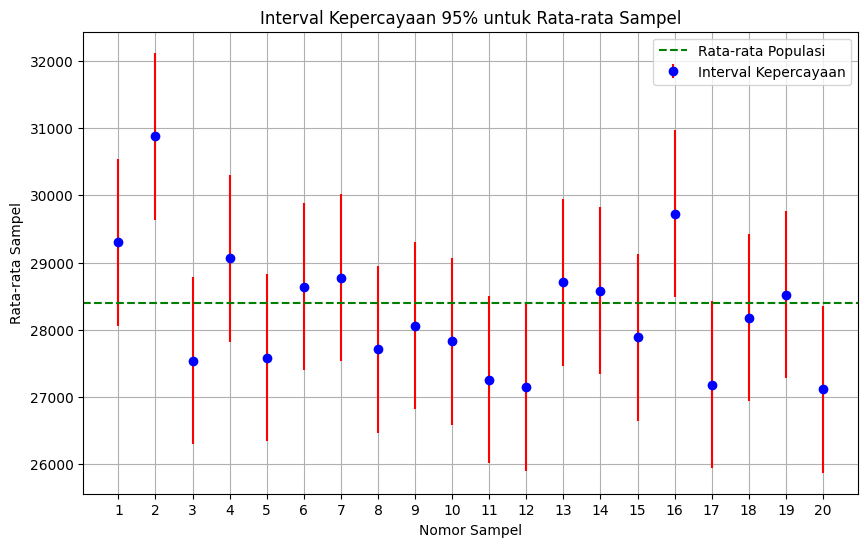

In [62]:
import matplotlib.pyplot as plt

# Data for plotting
sample_numbers = range(1, 21)  # Sample number (1-20)
lower_bounds = [interval[0] for interval in intervals]
upper_bounds = [interval[1] for interval in intervals]

# Computing population mean
population_mean = np.mean(kolom_penjualan)

# Plot confident interval and population mean
plt.figure(figsize=(10, 6))
plt.errorbar(sample_numbers, sample_means, yerr=[(u - l) / 2 for l, u in zip(lower_bounds, upper_bounds)],
             fmt='o', color='b', ecolor='r', capthick=2, label='Interval Kepercayaan')
plt.axhline(y=population_mean, color='g', linestyle='--', label='Rata-rata Populasi')
plt.xlabel('Nomor Sampel')
plt.ylabel('Rata-rata Sampel')
plt.title('Interval Kepercayaan 95% untuk Rata-rata Sampel')
plt.xticks(sample_numbers)
plt.legend()
plt.grid(True)
plt.show()
